In [1]:
import nltk
from pprint import pprint
import yaml
import sys
import os
#import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
dict_tagged_sentences = ''
# Below indicates the relative path to
# positive/negative/inverter/incrementer/decrementer files
DICTIONARY_DIR_PREFIX = 'dicts/'
import pandas as pd
import ast 

In [3]:
df=pd.read_csv("reddit.csv")

In [4]:
def define_sentiment(pol_score):
    if pol_score['compound']>0.05:
        sentiment = "positive"
    elif pol_score['compound']<-0.05:
        sentiment = "negative"
    else:
        sentiment = "netural"
    return sentiment

In [4]:
df2 = df.sort_values(by='comms_num',ascending=False)

In [21]:
df2.describe()

,comms_num,created,score,view_num
count,11898.000000,1.189800e+04,11898.000000,0.0
mean,72.514960,1.569871e+09,2573.083964,NaN
std,234.901785,1.860284e+06,7489.456335,NaN
min,0.000000,1.560093e+09,0.000000,NaN
25%,4.000000,1.569287e+09,32.000000,NaN
50%,14.000000,1.570654e+09,237.000000,NaN
75%,61.000000,1.571094e+09,2238.750000,NaN
max,8141.000000,1.572103e+09,130960.000000,NaN


In [20]:
df2.head()

,author,body,comment,comms_num,created,id,score,timestamp,title,upvote,url,view_num
7009,lebbe,NaN,['Update 18:00 — The protester who was shot is...,8141,1.569951e+09,dbqunq,83345,2019-10-02 01:31:01,Video of police shooting protester,NaN,https://v.redd.it/tdiv5if8fwp31,NaN
9927,lebbe,NaN,NaN,8140,1.569951e+09,dbqunq,83094,2019-10-02 01:31:01,Video of police shooting protester,NaN,https://v.redd.it/tdiv5if8fwp31,NaN
7990,lebbe,NaN,['Update 18:00 — The protester who was shot is...,8138,1.569951e+09,dbqunq,83460,2019-10-02 01:31:01,Video of police shooting protester,<bound method VotableMixin.upvote of Submissio...,https://v.redd.it/tdiv5if8fwp31,NaN
8984,lebbe,NaN,['Update 18:00 — The protester who was shot is...,8109,1.569951e+09,dbqunq,83917,2019-10-02 01:31:01,Video of police shooting protester,<bound method VotableMixin.upvote of Submissio...,https://v.redd.it/tdiv5if8fwp31,NaN
9009,diamondenn,NaN,"[""Boycott 👏 that 👏 shit 👏\n\nNever let this di...",3252,1.565880e+09,cqm7bc,38001,2019-08-15 22:32:15,Disney's Mulan Actress Liu Yifei supports poli...,<bound method VotableMixin.upvote of Submissio...,https://i.redd.it/7vwzhx8i4kg31.jpg,NaN


In [7]:
["weapons","shooting","attacking","murders",]
["actress","nba",""]
["Chan Yin Lam "]

In [19]:
for index, row in df.iterrows():
    print("title -> ",row["title"])
    print("num->",row["comms_num"])

title ->  A man damaged Lennon Wall and even tried thrown another man off the bridge
num-> 3
title ->  Starry Lee Wai King, Chairman of the Pro-CCP party DAB, suggested the Hong Kong Government sanction the US by confiscating the US assets in Hong Kong and limiting the US imports to Hong Kong. How should the US Congress respond?
num-> 4
title ->  HongKong protester valiantly defending press from pepper water spray with umbrella from police
num-> 0
title ->  The life of war correspondent (injury photo)
num-> 1
title ->  Washington, DC supporting Hong Kong's fight! (9.28.2019)
num-> 1
title ->  Cop carrying an M-16 into Hong Kong MTR station underneath IFC Mall tonight. (do you think there are rubber bullets or live rounds inside?)
num-> 5
title ->  Lyon-Nantes was scheduled at 13:30 to be broadcasted in China, Lyon ultras deploy a "Free Tibet" tifo
num-> 1
title ->  17 years old teen Jacob chu, who was brutally beaten by police was interviewed watch the video. link in comment
num-> 2
ti

num-> 3
title ->  "Liberate HK" banner unfurled next to a road where Carrie Lam's entourage may pass later for her "community dialogue".
num-> 2
title ->  Diazepam otc in Hong Kong?
num-> 8
title ->  Beijing vows to retaliate after US’ Hong Kong Human Rights and Democracy Act is approved by congressional committees
num-> 9
title ->  HK people have been "mourning" reviled politician Junius Ho by offering him a set of burial clothes.
num-> 10
title ->  HK activists and scholars set up independent election watchdog to attempt to ensure there is no malpractice in the upcoming November elections
num-> 0
title ->  Police give approval for Saturday protest rally on HK Island.
num-> 8
title ->  Police issued letter of no objection for the assembly organised by Civil Human Rights Front on 928
num-> 0
title ->  Hong Kong May Topple Communism (opinion piece in Wall Street Journal)
num-> 15
title ->  Aerial view of pro-democracy "artwork" at Chinese University HK today.
num-> 2
title ->  You and I

title ->  A long and trivial message from a Chinese student in the US for Hong Kong people and any others
num-> 84
title ->  As an outsider.....
num-> 15
title ->  Context of "an innocent man" beaten by protestors as suggested by the Hong Kong Police
num-> 1
title ->  929 Tokyo Rally confirmed. Please share!!
num-> 4
title ->  The CCP is taking this seriously: 熱烈慶祝中華人民共和國成立七十周年 (Celebrating 70 years of PRC) stuck on Sino Plaza, Causeway Bay today.
num-> 8
title ->  [Sound on] Football fan yells「光復香港」(“Take Back Hong Kong”) during Granada’s 2-0 La Liga win over Barcelona. You can hear him in the penalty replay behind the goalposts. Something lighthearted for a change.
num-> 0
title ->  Sorry if this has already been asked but is there any place in LA where we can show our support? Ex. Planned protests, volunteer support centers?
num-> 2
title ->  Thanks HK POPO for redefining OBJECT.
num-> 42
title ->  Hong Kong leader Carrie Lam ‘heartbroken’ over underaged arrestees.
num-> 12
title ->

title ->  Looks like great fun!
num-> 43
title ->  [Strategy] A stalemate means you lose. If the Police are illegitimately arresting Protestors, Maybe it's probably time for Protestors to start arresting Police.
num-> 64
title ->  People are making ticket machines print out chains of queueing tokens for Beijing-backed Maxim's Restaurant without eating there.
num-> 4
title ->  Protesters build giant bird "Freenix" out of hundreds of origami cranes
num-> 4
title ->  Hong Kong Jockey Club Community Cup postponed for safety concerns
num-> 1
title ->  Police filmed kicking an elderly "Safeguard Our Children" mediator/negotiator.
num-> 3
title ->  Bus drivers when they hear the police are releasing tear gas everywhere again
num-> 2
title ->  Outspoken businessman Tsang Hin-chi, former Hong Kong representative on China’s top legislative body, dies at age 85
num-> 2
title ->  Hong Kong police warn officers 'might have to kill someone' as violence escalates ( usa please put hk police in terrori

In [28]:
sia = SIA()

In [29]:
def add_sentiment_to_df(df):
    pos_per = []
    neg_per = []
    for index, row in df.iterrows():
    
        pol_score1 = sia.polarity_scores(str(row["title"]))
        title_sentiment = define_sentiment(pol_score1)

        #print("pol for title:",pol_score1['compound'])
    
        pol_score2 = sia.polarity_scores(str(row["body"]))
        body_sentiment = define_sentiment(pol_score2)
        
        #print("pol for body:",pol_score2['compound'])
        
        try:
            clist = ast.literal_eval(row['comment'])

            i=0
            pos = 0
            neg = 0 
            neu = 0 
        

            for c in clist:
                
                i+= 1 
                pol = sia.polarity_scores(c)
                
                if pol['compound']>0.05:
                    pos += 1 
                elif pol['compound']<-0.05:
                    neg += 1 
                else:
                    neu = neu+1  
                    
                    
            pos_per = (pos / i) * 100 
            neg_per = (neg/i) * 100 
        
                
    


            
            pos_per.append(pos_per)
            neg_per.append(neg_per)
            
        except:
            
            df.drop(index, inplace=True)

    return pos_per, neg_per
        
       

In [30]:
pos_per, neg_per = add_sentiment_to_df(df2)

In [32]:
import numpy as np
df['positive percentage'] = np.array(pos_per)
df["negative percentage"] = np.array(neg_per)

In [34]:
df.head(100)

,author,title,score,id,url,comms_num,created,body,view_num,comment,timestamp,positive percentage,negative percentage
0,ivan_422,A man damaged Lennon Wall and even tried throw...,7,dap5ns,https://v.redd.it/vbily8kbxfp31,3,1.569751e+09,NaN,NaN,['Damaging lennon walls is not only a fucking ...,2019-09-29 18:01:18,0.0,100.0
1,Sporeboss,"Starry Lee Wai King, Chairman of the Pro-CCP p...",3,dap5ch,https://i.redd.it/3mmgqym6xfp31.png,4,1.569751e+09,NaN,NaN,"[""Economic retardation. Taking such a measure ...",2019-09-29 18:00:28,0.0,100.0
2,Sporeboss,HongKong protester valiantly defending press f...,4,dap4be,https://twitter.com/JeremyJSandberg/status/117...,0,1.569751e+09,NaN,NaN,[],2019-09-29 17:57:53,0.0,100.0
3,Sporeboss,The life of war correspondent (injury photo),13,daoytt,https://i.redd.it/8jlapnz2ufp31.jpg,1,1.569750e+09,NaN,NaN,['these angel help document police brutality a...,2019-09-29 17:43:05,0.0,100.0
4,brodamon,"Washington, DC supporting Hong Kong's fight! (...",12,daovee,https://i.redd.it/y3g0bpvasfp31.jpg,1,1.569750e+09,NaN,NaN,"[""https://www.facebook.com/DC4HK/photos/a.1231...",2019-09-29 17:34:07,0.0,100.0
5,Sporeboss,Cop carrying an M-16 into Hong Kong MTR statio...,7,daouw1,https://i.redd.it/44z1w1s8sfp31.png,5,1.569750e+09,NaN,NaN,['link to post on twitter https://twitter.com/...,2019-09-29 17:32:47,0.0,100.0
6,armored-dinnerjacket,Lyon-Nantes was scheduled at 13:30 to be broad...,12,daoukr,https://twitter.com/Olimas99/status/1177907574...,1,1.569750e+09,NaN,NaN,['Man this is amazing. I love it'],2019-09-29 17:32:07,0.0,100.0
7,Sporeboss,"17 years old teen Jacob chu, who was brutally ...",8,daotc0,https://i.redd.it/19tznthjrfp31.png,2,1.569749e+09,NaN,NaN,"[""the beating was brutal and his injury was te...",2019-09-29 17:28:50,0.0,100.0
8,dream996,"[誠實豆沙包系列] - You can report me, but I don't hav...",11,daos11,https://www.youtube.com/watch?v=5QQFwohsbb0,5,1.569749e+09,NaN,NaN,['so right now in hongkong anyone can cosplay ...,2019-09-29 17:25:15,0.0,100.0
9,Sporeboss,interesting post. only leader image to remove....,9,daopzn,https://i.redd.it/4zrssuwxpfp31.png,4,1.569749e+09,NaN,NaN,['link to op on twitter https://twitter.com/hk...,2019-09-29 17:19:54,0.0,100.0


In [10]:
df2 = df.sort_values(by='comms_num',ascending=False)

In [11]:
import matplotlib.pyplot as plt

avg sentiment changes with title sentiment changes 

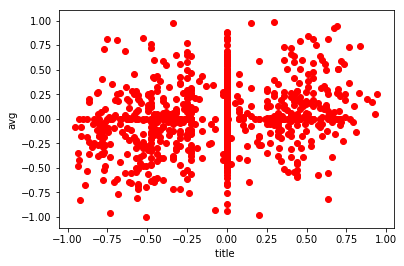

In [12]:
plt.scatter(df["title semtiment"],df["avg_pol_list"],color='r')
#plt.scatter(grades_range, boys_grades, color='g')
plt.xlabel('title ')
plt.ylabel('avg')
plt.show()

In [19]:
df3 = df.copy()

In [20]:
df3['datetime'] = pd.to_datetime(df3['timestamp'])

In [21]:
df3 = df3.set_index('datetime')
df3.head(2)

,author,title,score,id,url,comms_num,created,body,view_num,comment,timestamp,title semtiment,body_pol_list,avg_pol_list
datetime,,,,,,,,,,,,,,
2019-09-29 18:01:18,ivan_422,A man damaged Lennon Wall and even tried throw...,7,dap5ns,https://v.redd.it/vbily8kbxfp31,3,1.569751e+09,NaN,NaN,['Damaging lennon walls is not only a fucking ...,2019-09-29 18:01:18,-0.4404,0.0,-0.599733
2019-09-29 18:00:28,Sporeboss,"Starry Lee Wai King, Chairman of the Pro-CCP p...",3,dap5ch,https://i.redd.it/3mmgqym6xfp31.png,4,1.569751e+09,NaN,NaN,"[""Economic retardation. Taking such a measure ...",2019-09-29 18:00:28,0.5267,0.0,-0.227325


In [23]:
df4 = df3.resample("D").mean()

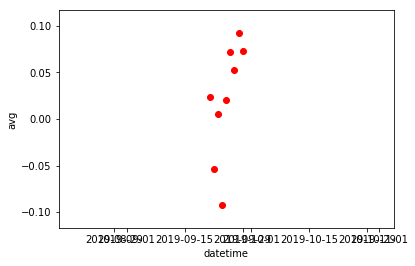

In [24]:
plt.scatter(df4.index,df4["avg_pol_list"],color='r')
#plt.scatter(grades_range, boys_grades, color='g')
plt.xlabel('datetime')
plt.ylabel('avg')
plt.show()

In [25]:
df4

,score,comms_num,created,view_num,title semtiment,body_pol_list,avg_pol_list
datetime,,,,,,,
2019-09-21,257.000000,18.500000,1.569077e+09,NaN,-0.130507,0.045329,0.023309
2019-09-22,536.579710,18.485507,1.569123e+09,NaN,-0.163967,0.009199,-0.053384
2019-09-23,346.661417,14.456693,1.569204e+09,NaN,-0.045144,0.024960,0.004961
2019-09-24,456.344538,20.361345,1.569296e+09,NaN,-0.129028,-0.010456,-0.092441
2019-09-25,320.526786,14.580357,1.569384e+09,NaN,-0.068135,-0.001646,0.020572
2019-09-26,425.348837,15.449612,1.569465e+09,NaN,-0.004188,0.049038,0.071803
2019-09-27,425.604651,16.813953,1.569548e+09,NaN,0.016411,0.027484,0.052666
2019-09-28,431.793814,16.649485,1.569641e+09,NaN,-0.071992,0.022480,0.092177
2019-09-29,175.144068,6.474576,1.569715e+09,NaN,-0.006925,0.016174,0.072803


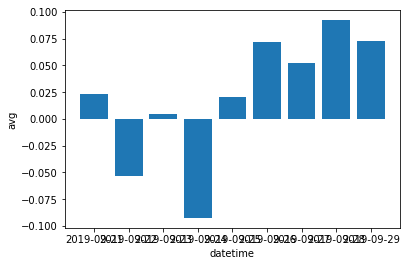

In [26]:
plt.bar(df4.index, df4["avg_pol_list"] )

plt.xlabel('datetime')
plt.ylabel('avg')
plt.show()

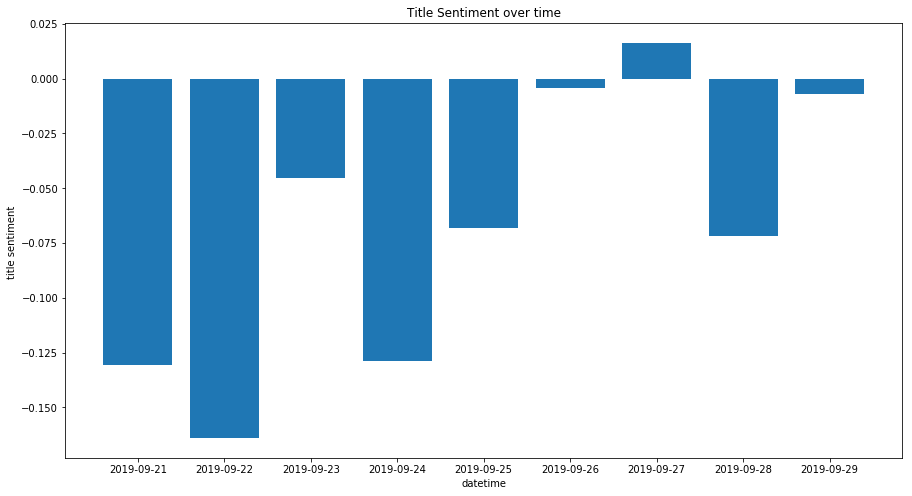

In [32]:
figure = plt.figure(figsize=(15,8))
plt.bar(df4.index, df4["title semtiment"])
plt.xlabel('datetime')
plt.ylabel('title sentiment ')
plt.title("Title Sentiment over time")
plt.show()